# Question

## [[link](https://stackoverflow.com/questions/65766669/counting-amount-of-occurrences-within-a-certain-frame-in-timestamps-on-pandas)] Counting amount of occurrences within a certain frame in timestamps on Pandas 

I have a file (txt) containing fake data with the following 3 columns:

---
```
user_13 visit_19    1330760979

user_14 visit_20    1330732782

user_14 visit_21    1330769600

user_14 visit_22    1330783341

user_14 visit_23    1330796012

user_14 visit_24    1330797842
```
---
Using Pandas, how can I find out from the time stamps on the third column, the amount of users who visited the page between 16:00 - 22:00?

One user might have more than one visit, in order to qualify to the list, the first and last visit must have been between 16:00 and 22:00.

# Answer

In [113]:
import pandas as pd
from io import StringIO
import datetime

In [114]:
%pprint

Pretty printing has been turned OFF


In [115]:
data = '''
user_13 visit_19    1330760979

user_14 visit_20    1330732782

user_14 visit_21    1330769600

user_14 visit_22    1330783341

user_14 visit_23    1330796012

user_14 visit_24    1330797842
'''
data = data.strip()      # remove trailing white-spaces and newline characters
data = io.StringIO(data) # create in-memory stream from the data string variable for use in read_csv

In [116]:
df = pd.read_csv(
     data,                              # the data in "CSV" format
     delim_whitespace=True,             # override default delimiter "," with whitespace
     names=['user','visit','timestamp'] # define column names for the resulting dataframe
)

df.values

array([['user_13', 'visit_19', 1330760979],
       ['user_14', 'visit_20', 1330732782],
       ['user_14', 'visit_21', 1330769600],
       ['user_14', 'visit_22', 1330783341],
       ['user_14', 'visit_23', 1330796012],
       ['user_14', 'visit_24', 1330797842]], dtype=object)

In [117]:
df['timestamp'] = pd.to_datetime(df['timestamp'], # replace "timestamp" column values with datetime equivalent 
                                 unit='s')        # with up to second precision

In [118]:
lb = 16 # lower hour bound
ub = 22 # upper hour bound
vb = df[
     (lb <= df['timestamp'].dt.hour) # compare hour in "timestamp" column to lb using dt accessor
     &                               # perform logical and series operator on the two resulting series
     (ub >= df['timestamp'].dt.hour) # compare hour in "timestamp" column to lb using dt accessor
]

vb.values

array([['user_14', 'visit_23', Timestamp('2012-03-03 17:33:32')],
       ['user_14', 'visit_24', Timestamp('2012-03-03 18:04:02')]],
      dtype=object)

In [120]:
print(vb.user.drop_duplicates().value_counts())

user_14    1
Name: user, dtype: int64



# By Jayson Salazar

|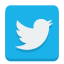|[@jdsalaro](https://twitter.com/jdsalaro)|
|-|:-|
|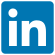|[https://linkedin.com/in/jdsalaro](http://linkedin.com/in/jdsalaro)|
|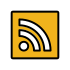|[https://jdsalaro.com](https://jdsalaro.com)|